# Biases conditional on WBGT values

- It is useful to know whether the biases of sWBGT and ESI are independent of WBGT values or not. A dependency between them indicates biases of different magnitudes for heat stress of different levels. 


- To explore it, we compare biases conditional on the 50th, 75th, 90th, 95th, 99th, and 99.9th percentile exceedance values of WBGT.


- In this notebook, we will reproduce Figure 4 in "Explicit Calculations of Wet Bulb Globe Temperature compared with approximations and why it matters for labor productivity" by Qinqin Kong and Matthew Huber. 

In [6]:
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cmaps
import regionmask
import cartopy.crs as ccrs

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import warnings
warnings.filterwarnings("ignore")

### Read in data:

In [8]:
# read in conditional biase
conditional_bias=xr.open_dataset('/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/conditional_bias.nc')

### Reproduce Figure 4

In [9]:
# create land mask
mask = regionmask.defined_regions.natural_earth.land_110.mask(conditional_bias,lon_name="longitude",lat_name="latitude")
# create meshgrid of latitude and longitude
LON,LAT=np.meshgrid(conditional_bias.longitude,conditional_bias.latitude)  

# function to plot each individual subplot
def subplot(data,pvalue,fig,k,norm,cmap,landmask,num,annot):
    axis = fig.add_subplot(4, 3, k, projection=ccrs.Robinson(central_longitude=10))
    anno_opts = dict(xy=(0, 1.05), xycoords='axes fraction',va='center', ha='center')
    axis.annotate(num, **anno_opts,fontsize=16) # add annotates
    anno_opts = dict(xy=(0.5, 1.1), xycoords='axes fraction',va='center', ha='center')
    axis.annotate(annot, **anno_opts,fontsize=16)
    
    g=axis.pcolormesh(LON, LAT,data.where(landmask==0),transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,rasterized=True) # make the plot
    pvalue.where(landmask==0).plot.contourf(ax=axis,transform=ccrs.PlateCarree(),
                         colors='none',levels=[0,0.05,1],hatches=[None,'///'],add_colorbar=False,alpha=0,rasterized=True)
    axis.coastlines(linewidth=0.5) # add coastlines
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,70]) # set extent of the map to exclude high latitudes
    return g

# function to make the whole plot    
def plot(conditional_bias):
    # create figure
    fig = plt.figure(figsize=[15, 10])
    # set the colorbar scale
    levels = [-7, -6, -5, -4, -3, -2, -1,-0.5,0.5,  1,  2,  3,  4,  5,  6,  7]
    norm=mpl.colors.BoundaryNorm(levels,ncolors=len(levels)+1,extend='both')
    # choose colormaps
    color=np.array([[8,29,88],
              [2,56,88],
              [4,90,141],
              [5,112,176],
              [54,144,192],
              [116,169,207],
              [166,189,219],
              [236,231,242],
              [255,255,255],
              [255,247,188],
              [254,196,79],
              [254,153,41],
              [236,112,20],
              [204,76,2],
              [153,52,4],
              [102,37,6],
              [223,101,176]])
    cmap=mpl.colors.ListedColormap(color/255.)
    nums=['a','b','c','d','e','f','g','h','i','j','k','l']
    annots=['50th','75th','90th','95th','99th','99.9th','50th','75th','90th','95th','99th','99.9th']
    for k in np.arange(1,7):
        subplot(conditional_bias.swbgt_bias.isel(quantiles=k),conditional_bias.swbgt_pvalue.isel(quantiles=k),
                  fig,k,norm,cmap,mask,nums[k-1],annots[k-1])
    for k in np.arange(7,13):
        g=subplot(conditional_bias.esi_bias.isel(quantiles=k-6),conditional_bias.esi_pvalue.isel(quantiles=k-6),
                  fig,k,norm,cmap,mask,nums[k-1],annots[k-1])
    # adjust the relative position of subplots
    fig.subplots_adjust(bottom=0, left=0,right=1, top=1,hspace=0.2,wspace=-0.3)
    axs=fig.get_axes()
    # add annotates
    anno_opts = dict(xy=(-0.1, -0.2), xycoords='axes fraction',va='center', ha='center')
    axs[0].annotate('sWBGT-WBGT', **anno_opts,fontsize=16,rotation=90)
    axs[6].annotate('ESI-WBGT', **anno_opts,fontsize=16,rotation=90)
    # make color bar
    cb=fig.colorbar(g,ax=axs,orientation='horizontal', pad=0.06,shrink=0.6,aspect=40,spacing='proportional',
                    ticks=np.arange(-7,8)) 
    cb.set_label(label="sWBGT/ESI - WBGT ($^\circ$C)", size=14)
    cb.ax.tick_params(labelsize=12)


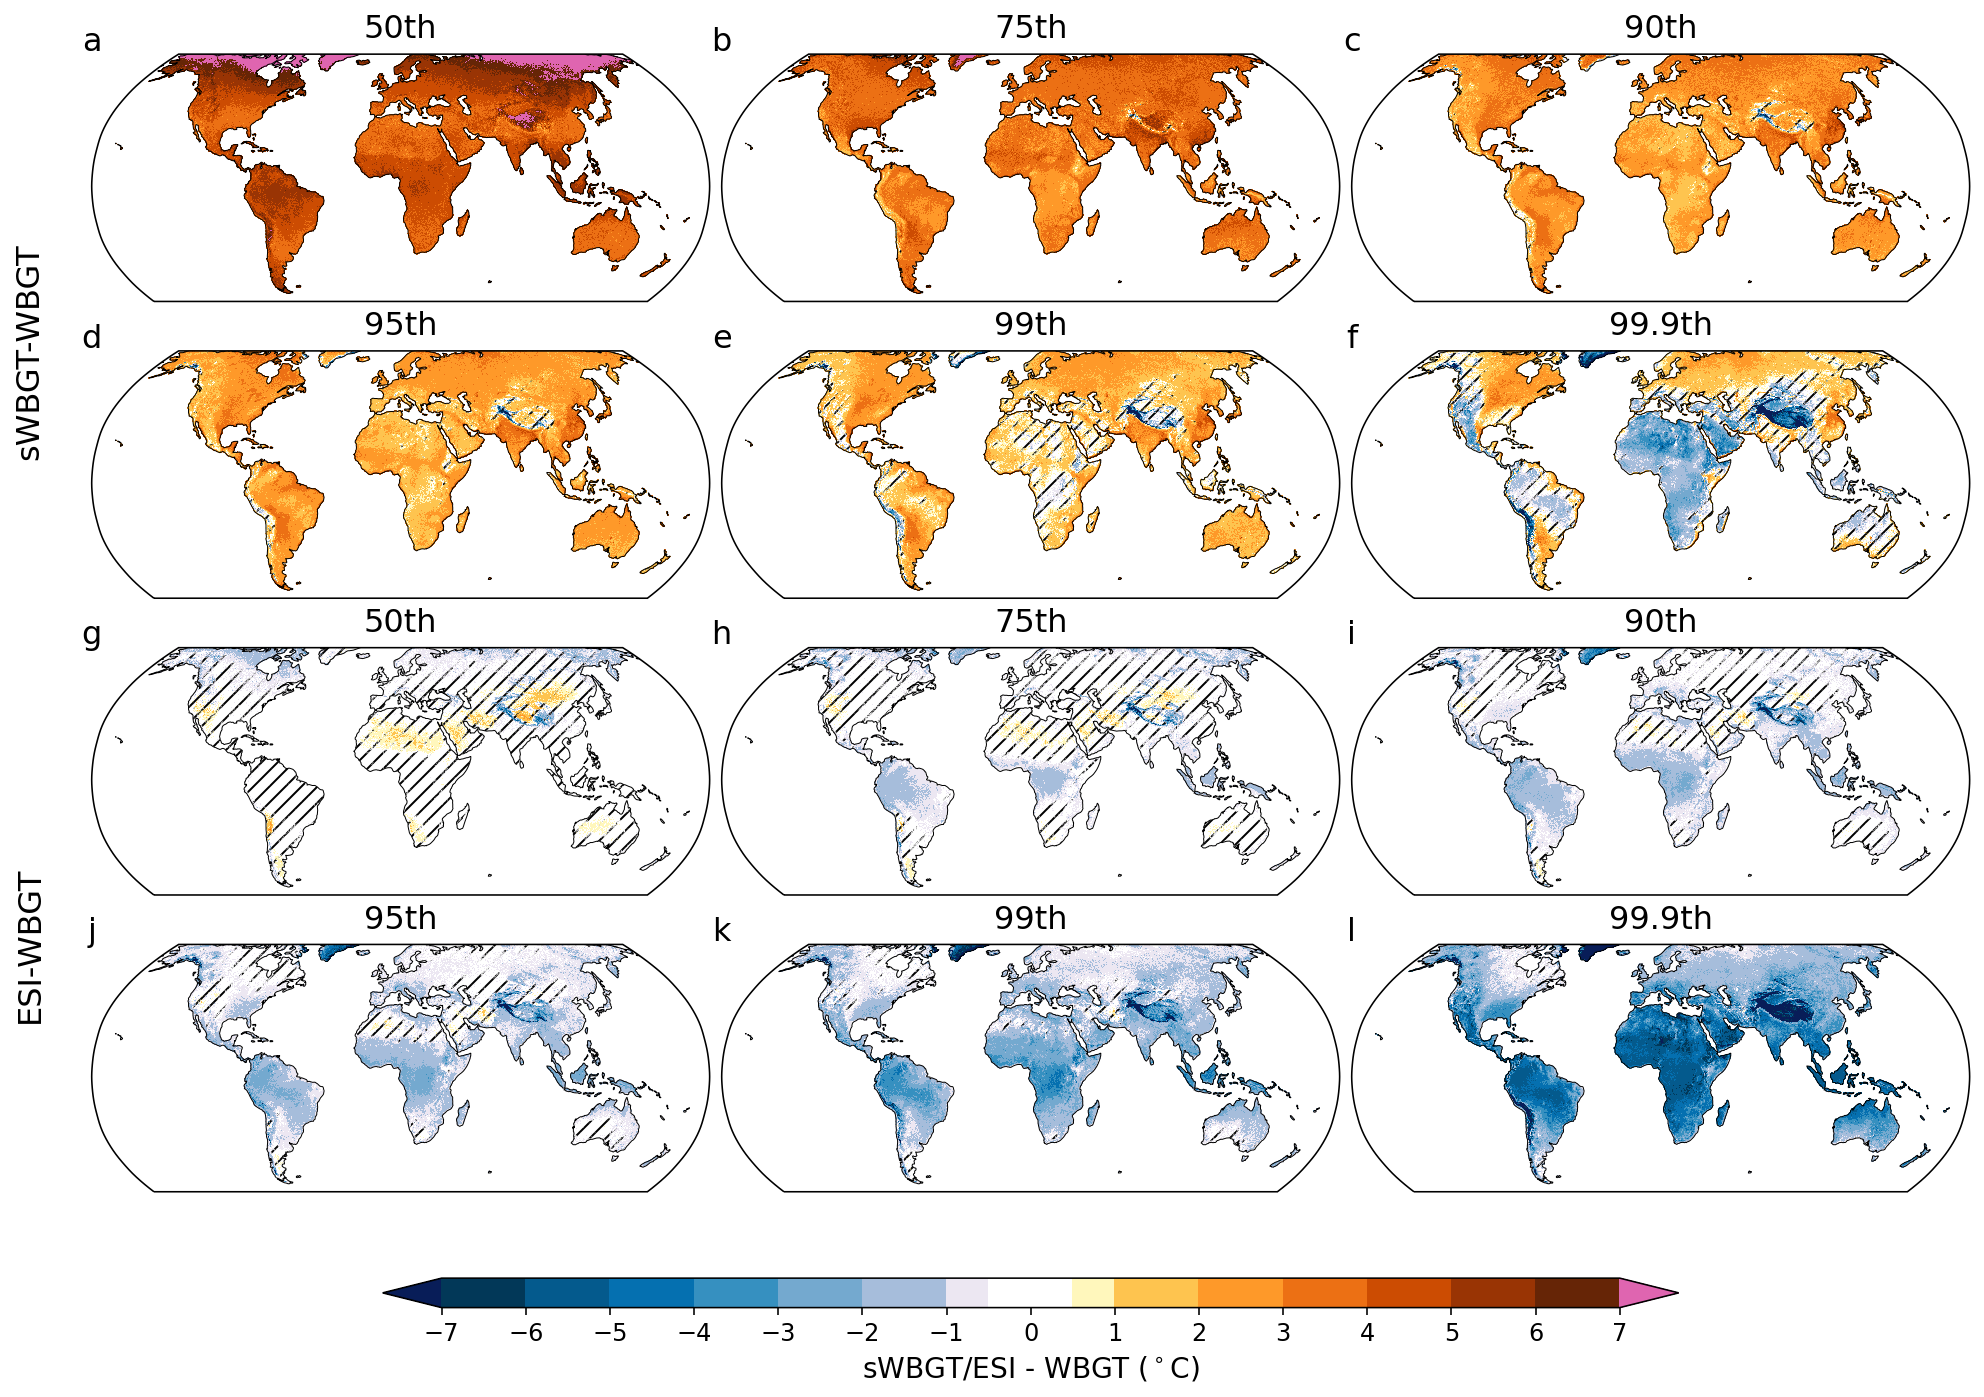

In [10]:
plot(conditional_bias)
plt.savefig("/scratch/brown/kong97/paper_data/earthfuture_kong_huber_2021/figures_Robinson/Figure4.pdf", bbox_inches='tight',dpi=400)

### Figure caption
Biases of (a-f) sWBGT and (g-l) ESI conditional on the (a, g) 50th, (b, h) 75th, (c, i) 90th, (d, j) 95th, (e, k) 99th, and (f, l) 99.9th percentile values of WBGT. Areas with biases not statistically significant at 5% level are hatched. Data of the whole year during 1990-2019 are included for analysis.